![title](poly.png)

### This model is still considered linear and the reason is the coefficients or weights i.e. b0, b1, b2 etc. are all linear but x (the feature) has become quadratic now

#### Hiring a new employee Mr. X. Negotiating and offering the most suitable salary package.


#### Mr.X claims he was receiving a package of 160K. The records obtained shows the salaries of employees of different positions offered in that company. Mr.X was working as a Regional Manager for 2 years and it takes about 4 years to be promoted to Partner

In [1]:
import pandas as pd
import numpy as np 


In [2]:
file = pd.read_csv("Position_Salaries.csv")
file.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
file["Position"].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


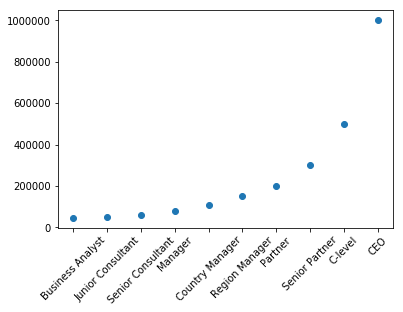

In [8]:
import matplotlib.pyplot as plt
plt.scatter(file["Position"], file["Salary"])
plt.xticks(rotation = 45)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(file[["Level"]],file["Salary"])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(file[["Level"]])
model_2 = LinearRegression()
model_2.fit(x_poly,file["Salary"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

the first column represents x^0. middle column is our original value of x and last column is x^2

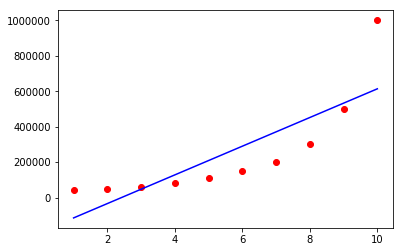

In [24]:
plt.scatter(file[["Level"]],file["Salary"], c="red")
plt.plot(file[["Level"]],model.predict(file[["Level"]]), color="blue")
plt.show()

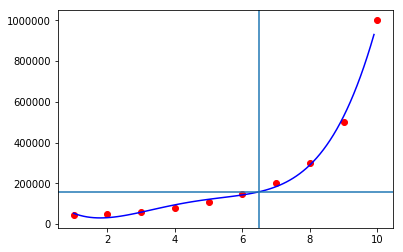

In [46]:

x_grid = np.arange(min(file["Level"]),max(file["Level"]), 0.1) #breaking down x scale by 0.1
x_grid = x_grid.reshape((len(x_grid), 1)) #reshaping to get a matrix
plt.scatter(file[["Level"]],file["Salary"], c="red")
plt.plot(x_grid,model_2.predict(poly.fit_transform(x_grid)), color="blue")
plt.axhline(160000)
plt.axvline(6.5)
plt.show()

### Prediction

In [61]:
model_2.predict(poly.fit_transform(6.5))

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.